# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [90]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('titanic.csv')

Use the `.info()` method to quickly preview which features have missing data

In [91]:
# Your code here
df.info()
df.Age.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
PassengerId    1391 non-null float64
Survived       1391 non-null float64
Pclass         1391 non-null object
Name           1391 non-null object
Sex            1391 non-null object
Age            1209 non-null float64
SibSp          1391 non-null float64
Parch          1391 non-null float64
Ticket         1391 non-null object
Fare           1391 non-null float64
Cabin          602 non-null object
Embarked       1289 non-null object
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


count    1209.000000
mean       29.731894
std        16.070125
min         0.420000
25%        20.000000
50%        27.000000
75%        40.000000
max        80.000000
Name: Age, dtype: float64

## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

count    1209.000000
mean       29.731894
std        16.070125
min         0.420000
25%        20.000000
50%        27.000000
75%        40.000000
max        80.000000
Name: Age, dtype: float64


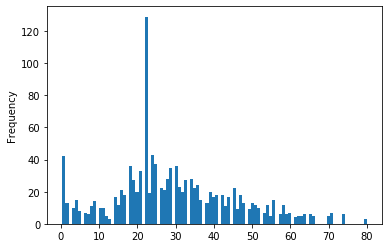

In [92]:
# Your code here
print(df.Age.describe())
df.Age.plot(kind='hist',bins=100)

## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

0 

 29.731894127377995


 count    1391.000000
mean       29.731894
std        14.981155
min         0.420000
25%        22.000000
50%        29.731894
75%        37.000000
max        80.000000
Name: Age, dtype: float64


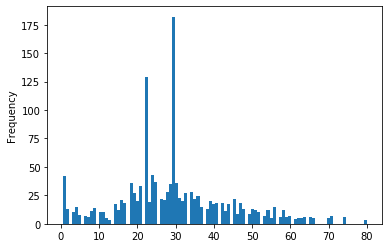

In [93]:
# Your code here
df2 = pd.read_csv('titanic.csv')
df2.Age = [df2.Age[i] if df2.Age.isna()[i] == 0 else df2.Age.mean() for i in range(len(df2.Age))]
print(df2.isna().sum()[5], '\n\n', df2.Age.mean())
print('\n\n', df2.Age.describe())
df2.Age.plot(kind='hist',bins=100)

### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the median age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

27.0
0 

 29.37445003594536 27.0


 count    1391.000000
mean       29.374450
std        15.009476
min         0.420000
25%        22.000000
50%        27.000000
75%        37.000000
max        80.000000
Name: Age, dtype: float64


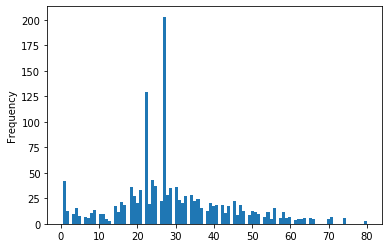

In [94]:
# Your code here# Your code here
df3 = pd.read_csv('titanic.csv')
print(df3.Age.median())
df3.Age = [df3.Age[i] if df3.Age.isna()[i] == 0 else df3.Age.median() for i in range(len(df3.Age))]
print(df3.isna().sum()[5], '\n\n', df3.Age.mean(),df3.Age.median())
print('\n\n', df3.Age.describe())
df3.Age.plot(kind='hist',bins=100)

### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

0 

 29.731894127378 27.0


 count    1209.000000
mean       29.731894
std        16.070125
min         0.420000
25%        20.000000
50%        27.000000
75%        40.000000
max        80.000000
Name: Age, dtype: float64


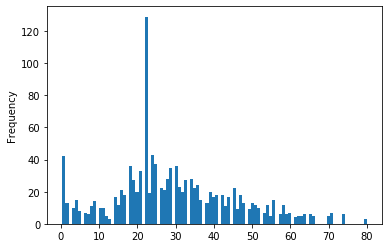

In [95]:
# Your code here
# Your code here# Your code here
df4 = pd.read_csv('titanic.csv')
df4 = df4.dropna(subset=['Age'])
print(df4.isna().sum()[5], '\n\n', df4.Age.mean(),df4.Age.median())
print('\n\n', df4.Age.describe())
df4.Age.plot(kind='hist',bins=100)

### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.